In [1]:
# importing libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt     
import seaborn as sns
import scipy

In [2]:
# setting a path 

path=r'C:\Users\User\Documents\Instacart Basket Analysis' 

In [3]:
print(path)

C:\Users\User\Documents\Instacart Basket Analysis


In [4]:
pickle_file=os.path.join(path,'02 Data', 'Prepared Data', 'instacart_merged.pkl')

In [5]:
# reading merged dataset
df=pd.read_pickle(pickle_file)

In [6]:
df.columns

Index(['Unnamed: 0', 'user_id', 'First_name', 'Surname', 'Gender', 'State',
       'Age', 'date_joined', 'No_of_dependants', 'fam_status', 'income',
       'Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0_y', 'order_id',
       'orders_sequence', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'merge_indicator', 'price_range_loc', 'order_day_description',
       'busiest_period_of_day', 'max_order', 'loyalty_flag'],
      dtype='object')

## Q1. What are the businest days of the week?

Saturday & Sunday receive the most number of orders.

In [9]:
# Mapping dictionary
day_of_week_mapping = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'}

In [10]:
# Replace department_id with department names
df['order_day'] = df['orders_day_of_week'].map(day_of_week_mapping)

In [11]:
df['order_day'].value_counts()

order_day
Saturday     1862554
Sunday       1701703
Friday       1348356
Monday       1265117
Thursday     1264907
Tuesday      1151409
Wednesday    1136268
Name: count, dtype: int64

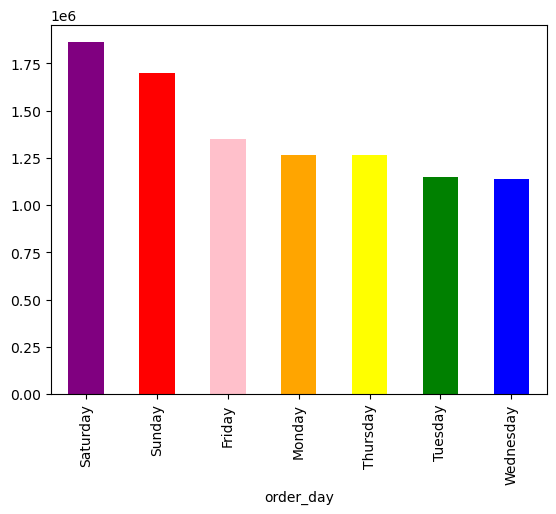

In [12]:
bar = df['order_day'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

## Q2. What are times of the day when peopel spend the most money? 

Between 10am and 4pm is hours with the heighst revenue and of all, 11am is the peak hour.

In [15]:
df.groupby('order_hour_of_day')['prices'].sum()

order_hour_of_day
0.0       583014.9
1.0       358661.4
2.0       321513.8
3.0       294676.4
4.0       254127.2
5.0       251242.8
6.0      1148645.8
7.0      3224911.1
8.0      6416788.6
9.0      8651817.2
10.0     9720202.8
11.0    10275444.8
12.0     9063190.1
13.0     9229702.1
14.0     8763075.9
15.0     9859805.7
16.0     9156744.0
17.0     7553307.7
18.0     5683045.0
19.0     4967807.1
20.0     3219323.7
21.0     3142687.1
22.0     1708316.5
23.0     1335704.8
Name: prices, dtype: float64

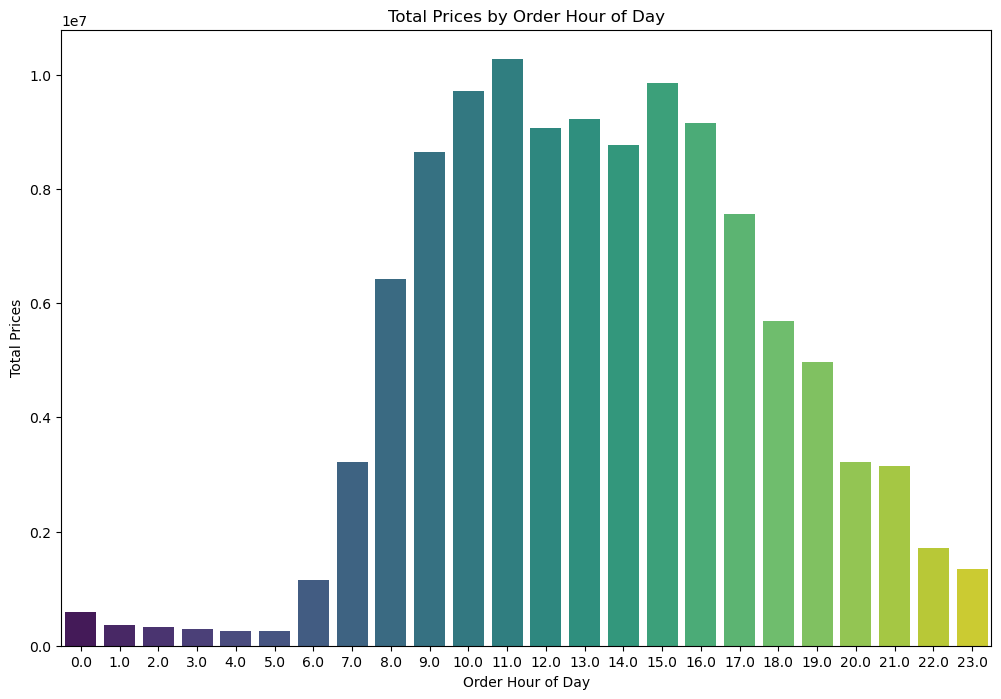

In [16]:
# Group by order_hour_of_day and calculate the total prices
total_prices_per_hour = df.groupby('order_hour_of_day')['prices'].sum().reset_index()

# Sort by order_hour_of_day for better visualization
total_prices_per_hour = total_prices_per_hour.sort_values(by='order_hour_of_day')

# Create horizontal bar chart
# Create horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=total_prices_per_hour, x='order_hour_of_day', y='prices', palette='viridis')
plt.title('Total Prices by Order Hour of Day')
plt.xlabel('Order Hour of Day')
plt.ylabel('Total Prices')
plt.show()

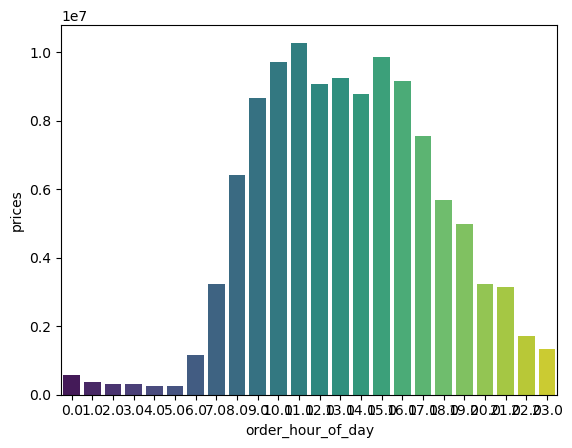

In [17]:
bar1=sns.barplot(data=total_prices_per_hour, x='order_hour_of_day', y='prices', palette='viridis')
# Save the chart as an image file

bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'total_prices_by_order_hour.png')) 

## Q4. What types of products are popular? Which department have the highest frequency of product orders? 

Popular products are fresh fruits and departments with highest frequency of product orders are 1. produce 2. dairy eggs 3. snacks. 

In [20]:
# Mapping dictionary
department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}

In [21]:
# Replace department_id with department names
df['department'] = df['department_id'].map(department_mapping)

In [22]:
# popular products
df.groupby('product_name').size().reset_index(name='order_frequency').sort_values(by='order_frequency', ascending=False)

,product_name,order_frequency
3576,Banana,141721
3374,Bag of Organic Bananas,113534
31097,Organic Strawberries,79773
28061,Organic Baby Spinach,72811
29498,Organic Hass Avocado,64341
...,...,...
12053,Decorating Sugar Marigold Orange,1
32316,Original Perky's Crunchy Rice Cereal,1
35586,Pumpkin Gnocchi,1
20707,Italian Herbs Organic Croutons,1


<Axes: xlabel='order_frequency', ylabel='product_name'>

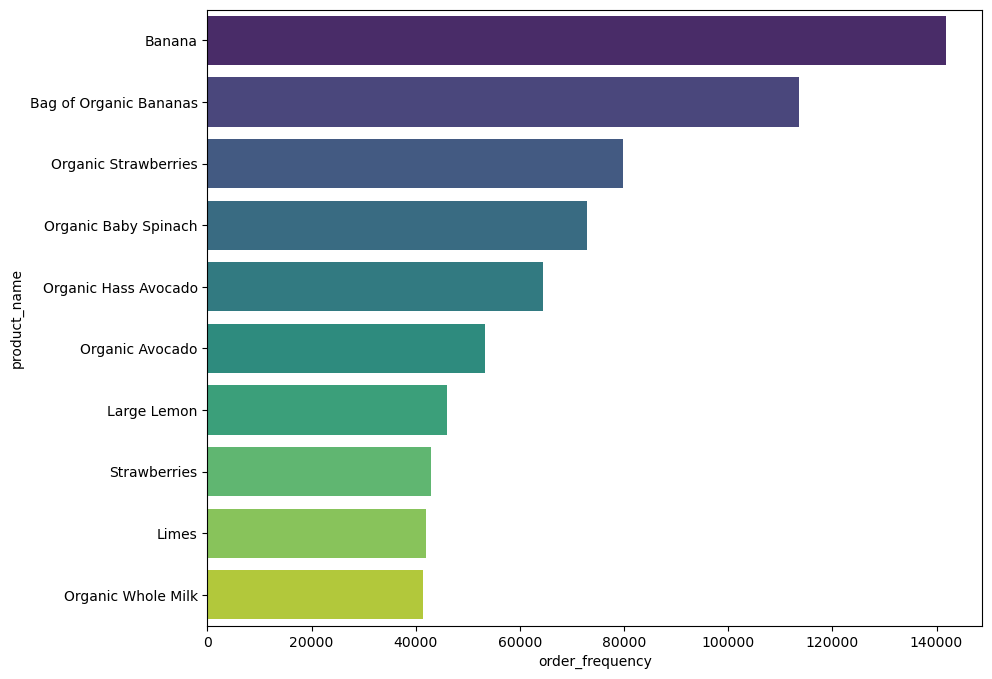

In [23]:
# Group by product_name and calculate order frequency
order_frequency = df.groupby('product_name').size().reset_index(name='order_frequency').sort_values(by='order_frequency', ascending=False)

# Select top 10 records
top_10_products = order_frequency.head(10)

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(data=top_10_products, x='order_frequency', y='product_name', palette='viridis')

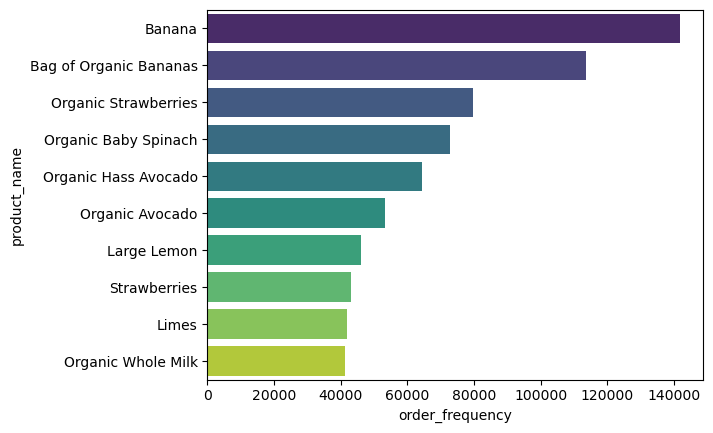

In [24]:
bar2=sns.barplot(data=top_10_products, x='order_frequency', y='product_name', palette='viridis')
# Save the chart as an image file

bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_10_products.png')) 

In [25]:
# departments with the highest frequency of product orders 
df.groupby('department')['order_id'].count().reset_index(name='order_frequency').sort_values(by='order_frequency', ascending=False)

,department,order_frequency
19,produce,2842924
7,dairy eggs,1625567
20,snacks,866101
3,beverages,805853
10,frozen,671827
16,pantry,562479
2,bakery,352751
6,canned goods,320132
8,deli,315568
9,dry goods pasta,259502


<Axes: xlabel='order_frequency', ylabel='department'>

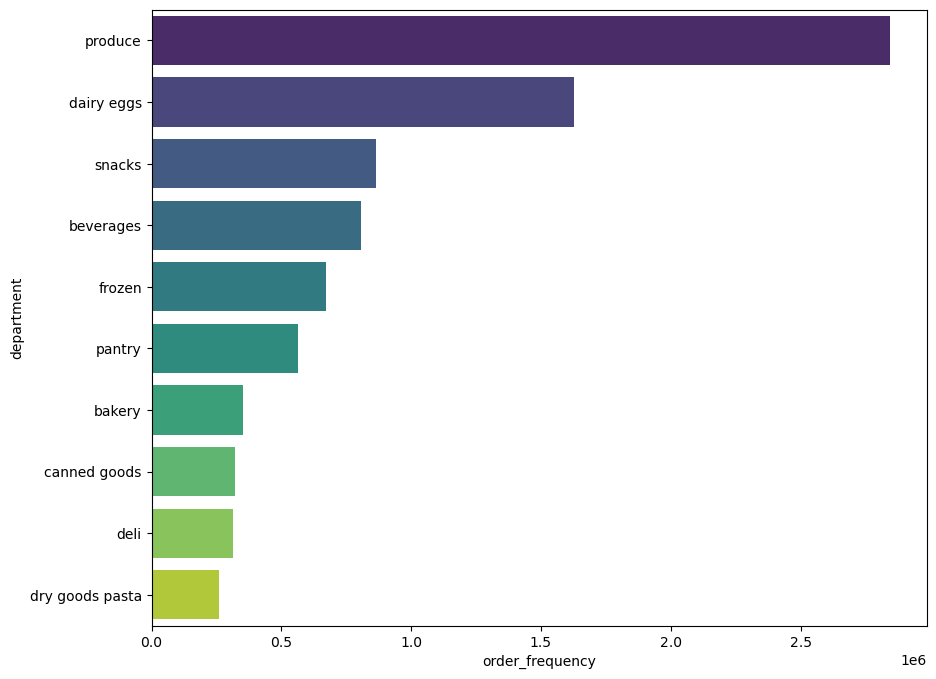

In [26]:
# Group by department and calculate order frequency
order_frequency = df.groupby('department')['order_id'].count().reset_index(name='order_frequency').sort_values(by='order_frequency', ascending=False)

# Select top 10 records
top_10_departments = order_frequency.head(10)

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(data=top_10_departments, x='order_frequency', y='department', palette='viridis')

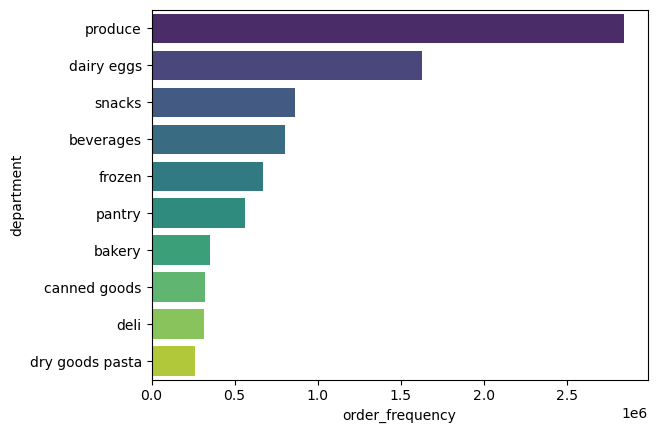

In [27]:
bar3=sns.barplot(data=top_10_departments, x='order_frequency', y='department', palette='viridis')
# Save the chart as an image file

bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_10_departments.png')) 

## Q5. What's the distribution among users in regards to their brand loyalty? (ex, how often do they return to Instacart?) 

Q1 (25th percentile): 11.0
Q3 (75th percentile): 56.0
IQR (Interquartile Range): 45.0

customers with order frequency, less than 11 are marked with 'Low' in 'Loyalty Flag'
customers with order frequency between 11 and 45 are marked with 'Medium' in 'Loyalty Flag'
customers with order frequency eual to or more than 56 are marked with 'High' in 'Loyalty Flag'

29% of total customers are low in terms of brand loyalty.
46% of total customers are medium in terms of brand loyalty.
35% of total customers are high in terms of brand loyalty. 

In [30]:
# customers order frequency
customer_order_frequency = df.groupby('user_id')['order_id'].count().reset_index(name='order_frequency').sort_values(by='order_frequency', ascending=False)

In [31]:
#Calculating IQR
Q1 = customer_order_frequency['order_frequency'].quantile(0.25)
Q3 = customer_order_frequency['order_frequency'].quantile(0.75)
IQR = Q3 - Q1

# Display the result
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")

Q1 (25th percentile): 11.0
Q3 (75th percentile): 56.0
IQR (Interquartile Range): 45.0


In [32]:
# Determining customer loyalty flag
def determine_loyalty(order_frequency):
    if order_frequency > 56:
        return 'High'
    elif 11 <= order_frequency <= 45:
        return 'Medium'
    else:
        return 'Low'

customer_order_frequency['loyalty_flag'] = customer_order_frequency['order_frequency'].apply(determine_loyalty)


In [33]:
# Display the result
print("Customer Loyalty Flag:")
print(customer_order_frequency)

Customer Loyalty Flag:
         user_id  order_frequency loyalty_flag
201267  201268.0             1074         High
129927  129928.0             1073         High
164054  164055.0              910         High
137628  137629.0              883         High
176477  176478.0              873         High
...          ...              ...          ...
46954    46955.0                0          Low
122336  122337.0                0          Low
46988    46989.0                0          Low
164736  164737.0                0          Low
122346  122347.0                0          Low

[206209 rows x 3 columns]


In [34]:
# Counting the number of each loyalty flag
customer_order_frequency['loyalty_flag'].value_counts().reset_index()

,loyalty_flag,count
0,Medium,95691
1,Low,58968
2,High,51550


## Q6. Are there differences in ordering habits based on customer's loyalty status? 

1. type of products being ordered ('price_range_loc')
2. size of average order 

In [37]:
df.columns

Index(['Unnamed: 0', 'user_id', 'First_name', 'Surname', 'Gender', 'State',
       'Age', 'date_joined', 'No_of_dependants', 'fam_status', 'income',
       'Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0_y', 'order_id',
       'orders_sequence', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'merge_indicator', 'price_range_loc', 'order_day_description',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'order_day',
       'department'],
      dtype='object')

In [149]:
# Create a crosstab to compare customer loyalty status in terms of product category 
crosstab1 = pd.crosstab(df['price_range_loc'], df['loyalty_flag'])
print(crosstab1)


loyalty_flag        Loyal customer  New customer  Regular customer
price_range_loc                                                   
High-range product           35840         25809             63692
Low-range product           964591        586268           1487435
Mid-range product          2088256       1261756           3216037


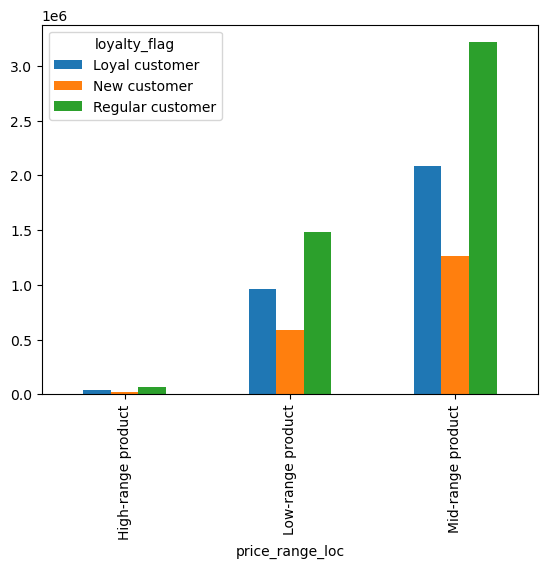

In [39]:
crosstab1 = pd.crosstab(df['price_range_loc'], df['loyalty_flag']).plot.bar (stacked=False)
crosstab1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_range_distribution_per_loyalty_status.png')) 

In [ ]:
# Ensure the directory exists
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Save the figure
crosstab1.figure.savefig(output_file)

In [40]:
# Calculate total order size per order_id
order_totals = df.groupby('order_id')['prices'].sum().reset_index()

In [41]:
# Merge back with original DataFrame to get loyalty_flag
df_merged = pd.merge(order_totals, df[['order_id', 'loyalty_flag']].drop_duplicates(), on='order_id')


In [165]:
# Calculate average order size per loyalty status
average_order_size = df_merged.groupby('loyalty_flag')['prices'].mean().reset_index()

KeyError: 'loyalty_flag'

In [43]:
# Rename the columns for clarity
average_order_size1.columns = ['loyalty_flag', 'average_order_size']

In [161]:
print(average_order_size)

NameError: name 'average_order_size1' is not defined

## Q7. Are there differences in ordering habits based on customer's region? 

1. distribution of loyalty status cross regions 
2. product types being ordered
3. average order size 

In [47]:
# creating a Northeast region list
northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'] 

# Creating 'Region' column and assigning 'Northeast' to the specified states
df.loc[df['State'].isin(northeast_states), 'Region'] = 'Northeast'

In [48]:
# creating a Midwest region list
Midwest_states = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'] 

# Creating 'Region' column and assigning 'Midwest' to the specified states 
df.loc[df['State'].isin(Midwest_states), 'Region'] = 'Midwest'

In [49]:
# creating a South region list
South_states =['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

# Creating 'Region' column and assigning 'Midwest' to the specified states 
df.loc[df['State'].isin(South_states), 'Region'] = 'South'

In [50]:
# creating a West region list
West_states = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'] 

# Creating 'Region' column and assigning 'Midwest' to the specified states 
df.loc[df['State'].isin(West_states), 'Region'] = 'West'

In [51]:
df.head(10)

,Unnamed: 0,user_id,First_name,Surname,Gender,State,Age,date_joined,No_of_dependants,fam_status,...,_merge,merge_indicator,price_range_loc,order_day_description,busiest_period_of_day,max_order,loyalty_flag,order_day,department,Region
0,0.0,26711.0,Deborah,Esquivel,Female,Missouri,48.0,1/1/2017,3.0,married,...,both,both,Mid-range product,Regularly busy,Most orders,8.0,New customer,Thursday,beverages,Midwest
1,0.0,26711.0,Deborah,Esquivel,Female,Missouri,48.0,1/1/2017,3.0,married,...,both,both,Low-range product,Slowest days,Regularly busy,8.0,New customer,Tuesday,produce,Midwest
2,0.0,26711.0,Deborah,Esquivel,Female,Missouri,48.0,1/1/2017,3.0,married,...,both,both,Low-range product,Businest days,Average orders,8.0,New customer,Sunday,snacks,Midwest
3,0.0,26711.0,Deborah,Esquivel,Female,Missouri,48.0,1/1/2017,3.0,married,...,both,both,Mid-range product,Regularly busy,Average orders,8.0,New customer,Monday,dairy eggs,Midwest
4,0.0,26711.0,Deborah,Esquivel,Female,Missouri,48.0,1/1/2017,3.0,married,...,both,both,Mid-range product,Slowest days,Regularly busy,8.0,New customer,Tuesday,dairy eggs,Midwest
5,0.0,26711.0,Deborah,Esquivel,Female,Missouri,48.0,1/1/2017,3.0,married,...,both,both,Mid-range product,Businest days,Most orders,8.0,New customer,Sunday,dairy eggs,Midwest
6,0.0,26711.0,Deborah,Esquivel,Female,Missouri,48.0,1/1/2017,3.0,married,...,both,both,Mid-range product,Slowest days,Regularly busy,8.0,New customer,Tuesday,produce,Midwest
7,1.0,33890.0,Patricia,Hart,Female,New Mexico,36.0,1/1/2017,0.0,single,...,both,both,Low-range product,Regularly busy,Average orders,12.0,Regular customer,Friday,canned goods,West
8,1.0,33890.0,Patricia,Hart,Female,New Mexico,36.0,1/1/2017,0.0,single,...,both,both,Mid-range product,Regularly busy,Regularly busy,12.0,Regular customer,Monday,dairy eggs,West
9,1.0,33890.0,Patricia,Hart,Female,New Mexico,36.0,1/1/2017,0.0,single,...,both,both,Mid-range product,Regularly busy,Average orders,12.0,Regular customer,Friday,dairy eggs,West


In [52]:
# Create a crosstab to compare customer loyalty status across region
crosstab2 = pd.crosstab(df['Region'], df['loyalty_flag'])
print(crosstab2)

loyalty_flag  Loyal customer  New customer  Regular customer
Region                                                      
Midwest               713493        441618           1127480
Northeast             552910        330854            834906
South                1022938        623408           1592891
West                  799534        478070           1212212


In [53]:
# Create a crosstab to product types being ordered across region
crosstab3 = pd.crosstab(df['Region'], df['price_range_loc'])
print(crosstab3)

price_range_loc  High-range product  Low-range product  Mid-range product
Region                                                                   
Midwest                       29215             713092            1540136
Northeast                     22027             537789            1158761
South                         41924            1009093            2187982
West                          32175             778320            1679170
nan                               0                  1                  1


In [54]:
# Calculate total order size per order_id
order_totals = df.groupby('order_id')['prices'].sum().reset_index()

# Merge back with original DataFrame to get Region
df_merged = pd.merge(order_totals, df[['order_id', 'Region']].drop_duplicates(), on='order_id')

In [55]:
# Calculate average order size per region
average_order_size = df_merged.groupby('Region')['prices'].mean().reset_index()

# Rename the columns for clarity
average_order_size.columns = ['Region', 'average_order_size']

print(average_order_size)

      Region  average_order_size
0    Midwest           43.047545
1  Northeast           41.032680
2      South           41.602702
3       West           40.371914


## Q8. Is tere a connection between age and family status in terms of odering habits?

correlation between age, family status and loyalty status 

In [58]:
# Create a crosstab to check the connection between age, family status, and loyalty status
crosstab_age = pd.crosstab(df['Age'], df['loyalty_flag'])
print(crosstab_age) 

loyalty_flag  Loyal customer  New customer  Regular customer
Age                                                         
18.0                   45509         29827             74829
19.0                   49498         29297             77335
20.0                   45085         30038             76322
21.0                   52458         29131             72452
22.0                   53910         28702             72206
...                      ...           ...               ...
77.0                   44683         31481             74548
78.0                   44821         29315             74809
79.0                   53388         28931             76811
80.0                   53430         28147             73147
81.0                   46992         29985             76103

[64 rows x 3 columns]


In [59]:
# Create a crosstab to check the connection between age, family status, and loyalty status
crosstab_result = pd.crosstab(df['fam_status'], df['loyalty_flag'])
print(crosstab_result)

loyalty_flag                      Loyal customer  New customer  \
fam_status                                                       
divorced/widowed                          264291        158815   
living with parents and siblings          148373         87818   
married                                  2163845       1317861   
single                                    512366        309456   

loyalty_flag                      Regular customer  
fam_status                                          
divorced/widowed                            408394  
living with parents and siblings            230216  
married                                    3350874  
single                                      778005  


## Q10. What difference can you find in ordering habits of different customer profiles? Consider price of orders, the frequency of orders, products being ordered, and anything else? 

In [62]:
# Creating the 'customer profiling' column
def customer_profiling(row):
    if row['fam_status'] in ['divorced/widowed', 'single'] and row['No_of_dependants'] == 0.0:
        return 'Single Solo Adult'
    elif row['Age'] < 35 and row['department_id'] == 18:
        return 'Young Parent'
    elif row['department_id'] == 8:
        return 'Pet Owner'
    elif row['No_of_dependants'] >= 3:
        return 'Big Family'
    else:
        return 'Other'

df['customer profiling'] = df.apply(customer_profiling, axis=1)

In [63]:
# Sorting and aggregating the result by 'user_id'
result = df.sort_values(by='user_id').groupby('user_id').agg({'customer profiling': lambda x: x.mode()[0] if not x.mode().empty else 'Other'})

In [64]:
# Counting the occurrences of each customer profile
profile_counts = result['customer profiling'].value_counts()
print(profile_counts)

customer profiling
Other                102959
Single Solo Adult     51602
Big Family            51570
Pet Owner                55
Young Parent             23
Name: count, dtype: int64


In [65]:
# create a crosstab to compare product types being ordered per customer profile 
crosstab_cus_prof=pd.crosstab(df['customer profiling'], df['price_range_loc']) 
print(crosstab_cus_prof)

price_range_loc     High-range product  Low-range product  Mid-range product
customer profiling                                                          
Big Family                       31928             757750            1637034
Other                            62715            1507252            3255078
Pet Owner                            0               6658              15327
Single Solo Adult                30698             759448            1641025
Young Parent                         0               7187              17586


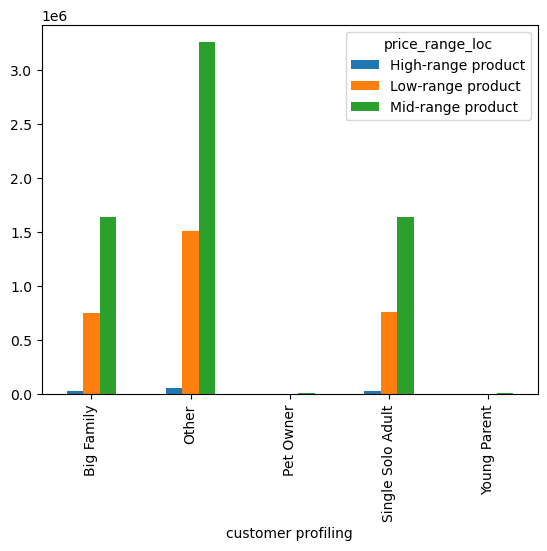

In [66]:
crosstab_cus_prof =pd.crosstab(df['customer profiling'], df['price_range_loc']).plot.bar() 
crosstab_cus_prof.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_range_distribution_per_customer_profile.png')) 

In [ ]:
# Ensure the directory exists
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Save the figure
crosstab1.figure.savefig(output_file)

In [67]:
# create a crosstab to compare product types being ordered per customer profile 
crosstab_cus_prof2=pd.crosstab(df['customer profiling'], df['loyalty_flag']) 
print(crosstab_cus_prof2)

loyalty_flag        Loyal customer  New customer  Regular customer
customer profiling                                                
Big Family                  770205        465388           1191262
Other                      1526539        931990           2366845
Pet Owner                     5688          4653             11644
Single Solo Adult           776657        468271           1186399
Young Parent                  9786          3648             11339


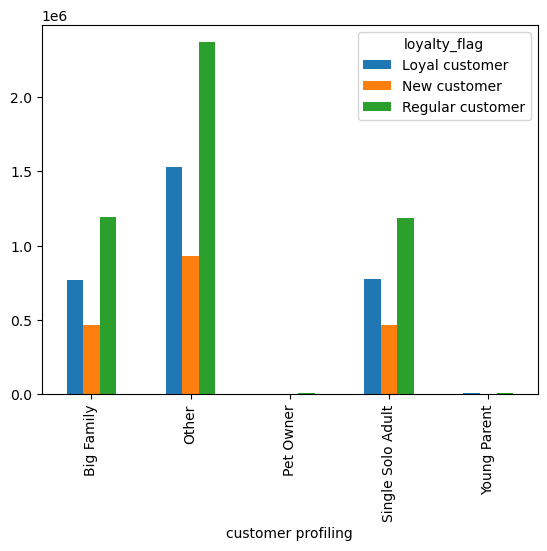

In [68]:
crosstab_cus_prof2=pd.crosstab(df['customer profiling'], df['loyalty_flag']).plot.bar()
crosstab_cus_prof2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_status_distribution_per_customer_profile.png')) 

In [137]:
# Merge back with original DataFrame to get customer profile group
df_merged = pd.merge(order_totals, df[['order_id', 'customer profiling']].drop_duplicates(), on='order_id')

In [139]:
# Calculate average spent per order per customer profile group
average_spent_per_order = df_merged.groupby('customer profiling')['prices'].mean().reset_index()

In [141]:
# Rename columns for clarity
average_spent_per_order.columns = ['customer profiling', 'average_spent_per_order']

print(average_spent_per_order)

  customer profiling  average_spent_per_order
0         Big Family                40.738991
1              Other                42.053772
2          Pet Owner                59.375662
3  Single Solo Adult                41.421770
4       Young Parent                51.052652


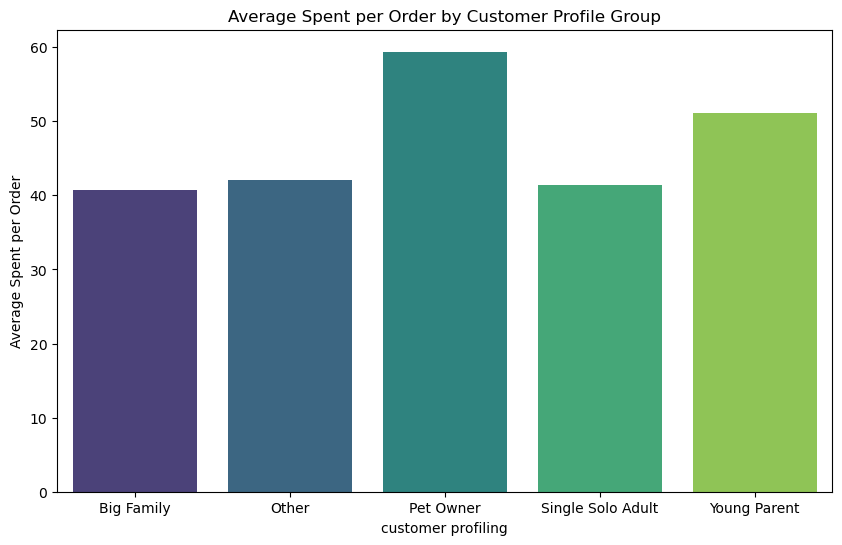

In [143]:
plt.figure(figsize=(10, 6))
bar5=sns.barplot(data=average_spent_per_order, x='customer profiling', y='average_spent_per_order', palette='viridis')
plt.title('Average Spent per Order by Customer Profile Group')
plt.xlabel('customer profiling')
plt.ylabel('Average Spent per Order')
plt.show()

In [167]:
output_path = os.path.join('04 Analysis', 'Visualizations', 'Aaverage_spent_per_order_by_Customer_profile_group.png')
plt.savefig(output_path)

<Figure size 640x480 with 0 Axes>